In [26]:
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from datetime import datetime
from pathlib import Path
import matplotlib.pyplot as plt

In [27]:
alpaca_api_key = "PKJYB527YAQVS4J907RJ"
alpaca_secret_key = "zb5bvTpu8cWaKIgAbDCESouV9MX0qn4RXiQzS5n8"

In [28]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [29]:
# Set the tickers
tickers = ["SPY"]

In [30]:
# Set timeframe to one day ("1Day") for the Alpaca API
timeframe = "1Day"

In [31]:
# Format start and end dates as ISO format for one year period
start = pd.Timestamp("2014-02-07", tz="America/New_York").isoformat()
end = pd.Timestamp("2020-02-07", tz="America/New_York").isoformat()



In [32]:
# Get closing prices for SPY from the last year
df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start,
    end = end
).df

# Display sample data
df.head(10)

,close,high,low,trade_count,open,volume,vwap,symbol
timestamp,,,,,,,,
2016-01-04 05:00:00+00:00,201.0192,201.03,198.59,655489,200.490,225903783,200.656423,SPY
2016-01-05 05:00:00+00:00,201.3600,201.90,200.05,418709,201.405,112719152,201.084280,SPY
2016-01-06 05:00:00+00:00,198.8200,200.06,197.60,548386,198.330,153948196,198.956460,SPY
2016-01-07 05:00:00+00:00,194.0500,197.44,193.59,796451,195.330,216191953,195.345911,SPY
2016-01-08 05:00:00+00:00,191.9230,195.85,191.58,754102,195.190,216105404,193.644537,SPY
2016-01-11 05:00:00+00:00,192.1100,193.41,189.82,701548,193.010,205368067,191.757659,SPY
2016-01-12 05:00:00+00:00,193.6608,194.55,191.14,635749,193.820,175844276,192.902295,SPY
2016-01-13 05:00:00+00:00,188.8300,194.86,188.38,812694,194.450,223632834,191.134590,SPY
2016-01-14 05:00:00+00:00,191.9300,193.26,187.66,824320,189.550,243821116,190.776550,SPY


In [33]:
df = df.drop(columns=['symbol'])

In [34]:
df['signal'] = 0
df

,close,high,low,trade_count,open,volume,vwap,signal
timestamp,,,,,,,,
2016-01-04 05:00:00+00:00,201.0192,201.0300,198.59,655489,200.490,225903783,200.656423,0
2016-01-05 05:00:00+00:00,201.3600,201.9000,200.05,418709,201.405,112719152,201.084280,0
2016-01-06 05:00:00+00:00,198.8200,200.0600,197.60,548386,198.330,153948196,198.956460,0
2016-01-07 05:00:00+00:00,194.0500,197.4400,193.59,796451,195.330,216191953,195.345911,0
2016-01-08 05:00:00+00:00,191.9230,195.8500,191.58,754102,195.190,216105404,193.644537,0
...,...,...,...,...,...,...,...,...
2020-02-03 05:00:00+00:00,324.1200,326.1600,323.22,368446,323.350,71170107,324.389725,0
2020-02-04 05:00:00+00:00,329.0600,330.0100,327.72,312753,328.070,64065469,328.623197,0
2020-02-05 05:00:00+00:00,332.8400,333.0900,330.67,352029,332.270,67402342,332.020257,0


In [35]:
# Function to create the signal
def signal_creator_5(row):
    percent_diff = (row['close'] - row['shifted_close_5']) / row['shifted_close_5']
    if percent_diff > 0.03:
        return 1
    elif percent_diff < -0.03:
        return -1
    else:
        return 0

In [36]:
def signal_creator_15(row):
    percent_diff = (row['close'] - row['shifted_close_15']) / row['shifted_close_15']
    if percent_diff > 0.03:
        return 1
    elif percent_diff < -0.03:
        return -1
    else:
        return 0

In [37]:
def signal_creator_30(row):
    percent_diff = (row['close'] - row['shifted_close_30']) / row['shifted_close_30']
    if percent_diff > 0.03:
        return 1
    elif percent_diff < -0.03:
        return -1
    else:
        return 0

In [38]:
# 5 day shift
df['shifted_close_5'] = df['close'].shift(periods=5)
df['signal_5'] = 0
df['signal_5'] = df.apply(signal_creator_5, axis=1)

In [39]:
# 15 day shift
df['shifted_close_15'] = df['close'].shift(periods=15)
df['signal_15'] = 0
df['signal_15'] = df.apply(signal_creator_15, axis=1)

In [40]:
# 30 day shift
df['shifted_close_30'] = df['close'].shift(periods=30)
df['signal_30'] = 0
df['signal_30'] = df.apply(signal_creator_30, axis=1)

In [41]:
# Columns and NA drops to prevent data leakege
df.dropna(inplace=True)
df.drop(columns=['shifted_close_5','shifted_close_15','shifted_close_30'],inplace=True)
display(df.head(50))

,close,high,low,trade_count,open,volume,vwap,signal,signal_5,signal_15,signal_30
timestamp,,,,,,,,,,,
2016-02-17 05:00:00+00:00,192.8800,193.3200,191.0100,531583,191.17,137936059,192.270038,0,1,0,-1
2016-02-18 05:00:00+00:00,192.0900,193.2700,191.7200,459680,193.20,103630950,192.382572,0,1,0,-1
2016-02-19 05:00:00+00:00,192.0000,192.1800,190.4500,424661,191.17,117844861,191.562853,0,1,0,-1
2016-02-22 05:00:00+00:00,194.7800,194.9500,193.7900,360507,193.87,110378274,194.347157,0,1,0,0
2016-02-23 05:00:00+00:00,192.3200,194.3200,192.1800,434602,193.99,112962491,193.064938,0,0,0,0
2016-02-24 05:00:00+00:00,193.2000,193.5300,189.3200,588124,190.63,159573885,191.513613,0,0,0,0
2016-02-25 05:00:00+00:00,195.5400,195.5500,192.8300,417790,193.73,114169518,194.235931,0,0,0,0
2016-02-26 05:00:00+00:00,195.0892,196.6800,194.9000,461021,196.57,133322130,195.672790,0,0,0,1
2016-02-29 05:00:00+00:00,193.3500,196.2300,193.3300,428044,195.11,130754750,194.723359,0,0,0,0


In [42]:
# Separate features and target
features = df.drop(columns = ['signal_5', 'signal_15', 'signal_30'], axis=1)
target = df.drop(columns = ['close', 'high', 'low', 'trade_count', 'open', 'volume', 'vwap'], axis=1)
display(target)

,signal,signal_5,signal_15,signal_30
timestamp,,,,
2016-02-17 05:00:00+00:00,0,1,0,-1
2016-02-18 05:00:00+00:00,0,1,0,-1
2016-02-19 05:00:00+00:00,0,1,0,-1
2016-02-22 05:00:00+00:00,0,1,0,0
2016-02-23 05:00:00+00:00,0,0,0,0
...,...,...,...,...
2020-02-03 05:00:00+00:00,0,0,0,0
2020-02-04 05:00:00+00:00,0,0,0,0
2020-02-05 05:00:00+00:00,0,0,0,1


In [43]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# # Fit the ARIMA model
# # Replace p, d, q with your chosen values
# p = 5
# d = 1
# q = 0

# model = ARIMA(df['close'], order=(p, d, q))
# model_fit = model.fit()

# # Forecasting
# forecast = model_fit.forecast(steps=5)

# # Display the forecast
# print(forecast)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1002
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2137.288
Date:                Wed, 13 Dec 2023   AIC                           4286.576
Time:                        20:55:22   BIC                           4316.028
Sample:                    02-17-2016   HQIC                          4297.769
                         - 02-07-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0240      0.021     -1.118      0.263      -0.066       0.018
ar.L2         -0.0447      0.022     -2.030      0.042      -0.088      -0.002
ar.L3          0.0346      0.021      1.647      0.0

/var/folders/v3/74k5z7qn6s9blqgwvn0v3rbm0000gn/T/ipykernel_8884/3798745839.py:16: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  series.index = pd.to_datetime(series.index).to_period('D')


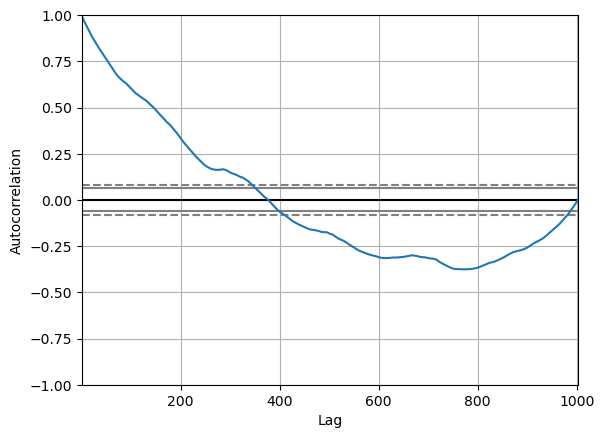

In [44]:
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

# # Fetching data from Alpaca (example for 'SPY')
# symbol = "SPY"
# start_date = "2014-02-07"
# end_date = "2020-02-07"
# timeframe = tradeapi.TimeFrame.Day

# df = alpaca.get_bars(symbol, timeframe, start_date, end_date).df

# Use 'close' prices for ARIMA
series = df['close']

# Convert the index to a PeriodIndex for daily frequency
series.index = pd.to_datetime(series.index).to_period('D')

# Fit the ARIMA model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()

# Summary of the fitted model
print(model_fit.summary())

# Check index type and plot autocorrelation
print("Index type before conversion:", type(series.index))
autocorrelation_plot(series)
pyplot.show()

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# def ArimaModel(model):

# Split the DataFrame into training and testing sets (90% train, 10% test)
train_data, test_data = df[0:int(len(df)*0.9)], df[int(len(df)*0.9):]

# Prepare the training and testing data (using 'close' prices)
train_arima = train_data['close']
test_arima = test_data['close']

# Initialize history with the training data
history = [x for x in train_arima]
# Prepare a list to store the forecasts
predictions = []

# Loop over the test data
for t in range(len(test_arima)):
    # Fit the ARIMA model
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()

    # Forecast the next value
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)

    # Add the actual observation to history for the next loop
    history.append(test_arima.iloc[t])


In [46]:
yhat

334.0309926792772

In [47]:
# report performance
mse = mean_squared_error(test_arima, predictions)
print('MSE: ' + str(mse))

mae = mean_absolute_error(test_arima, predictions)
print('MAE: ' + str(mae))

rmse = math.sqrt(mse)
print('RMSE: ' + str(rmse))

MSE: 4.03381606888983
MAE: 1.5218307654867842
RMSE: 2.0084362247504473


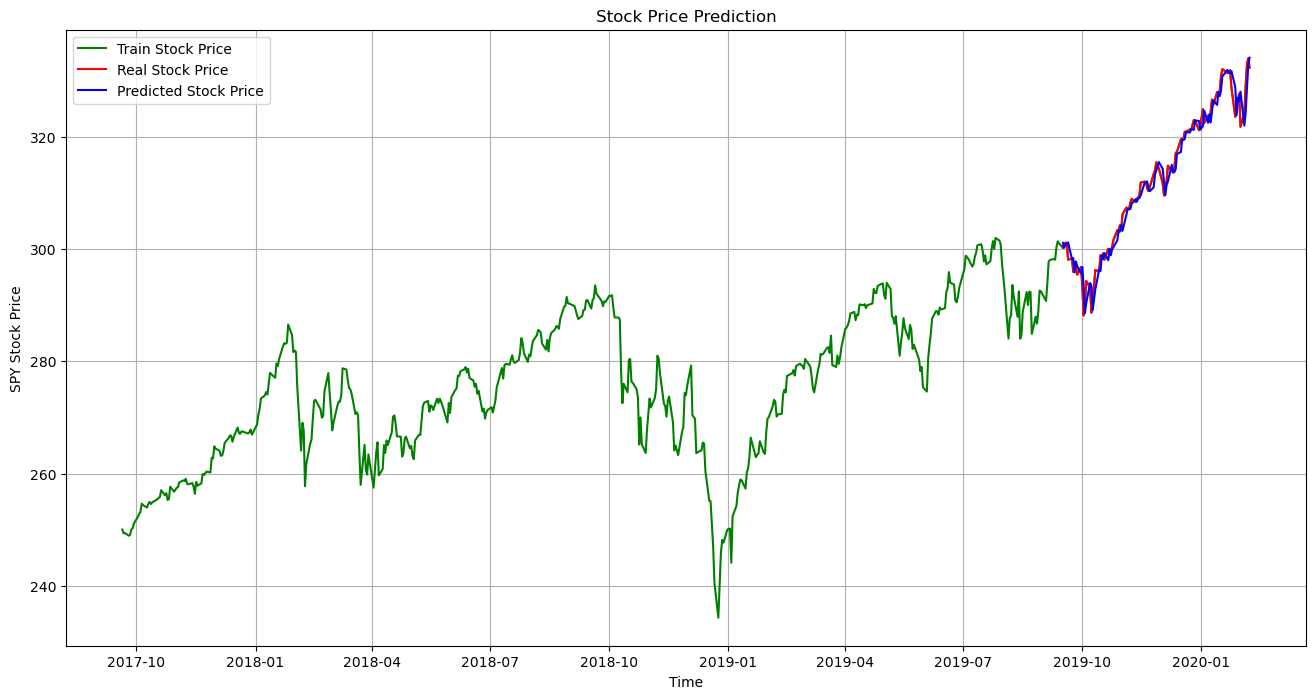

In [48]:
# Plot the predictions
plt.figure(figsize=(16,8))
plt.plot(df.index[-600:], df['close'].tail(600), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, test_arima, color = 'red', label = 'Real Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('SPY Stock Price')
plt.legend()
plt.grid(True)
plt.savefig('arima_model.pdf')
plt.show()



In [49]:
# Function to interpret predictions
def interpret_prediction(prediction):
    percent_difference = (prediction['close'] - prediction['predicted']) / prediction['predicted']
    if prediction > 0.03:
        return 1  # Buy
    elif prediction < -0.03:
        return -1  # Sell
    else:
        return 0  # Hold

In [50]:
results_5 = [interpret_prediction(p) for p in predictions]
print(results_5[:-25])

IndexError: invalid index to scalar variable.

In [51]:
123

123